# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

<IPython.core.display.Javascript object>


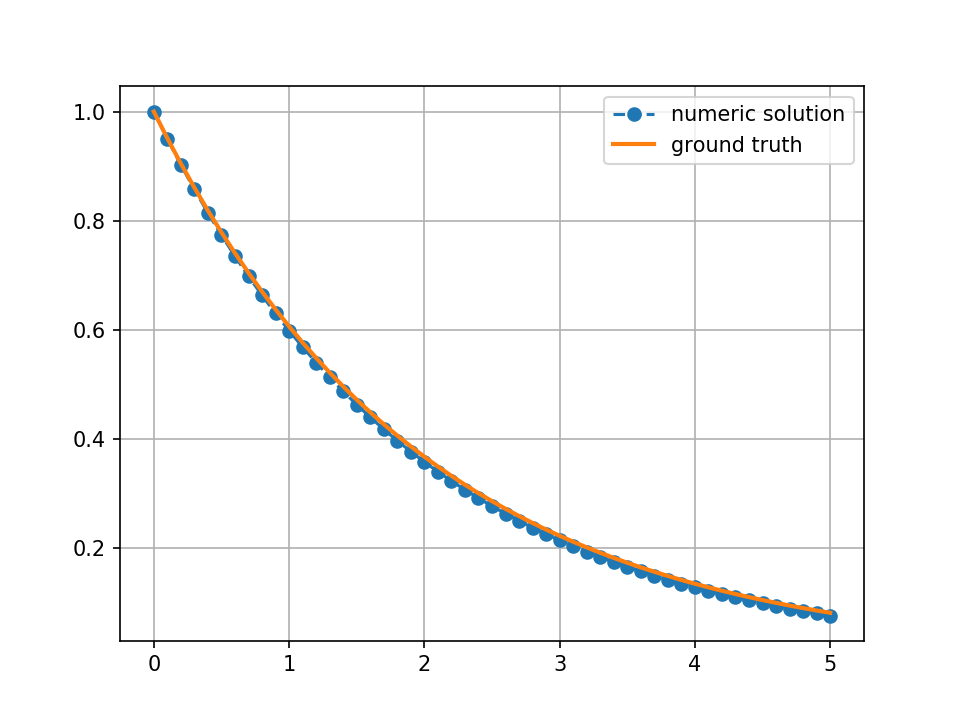

In [10]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

<IPython.core.display.Javascript object>


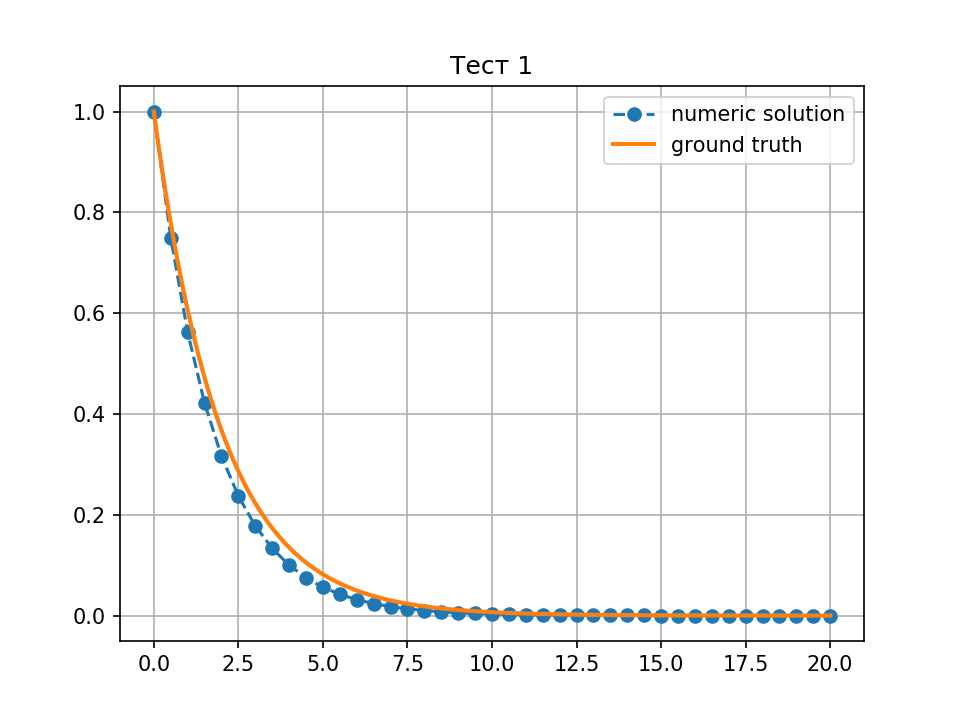

In [85]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=20, dt=0.5)
ttt = np.linspace(min(tt), max(tt), 1000)

plt.figure('Тест 1')
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(ttt, np.exp(lam*ttt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.title('Тест 1')
plt.grid(True)

<IPython.core.display.Javascript object>


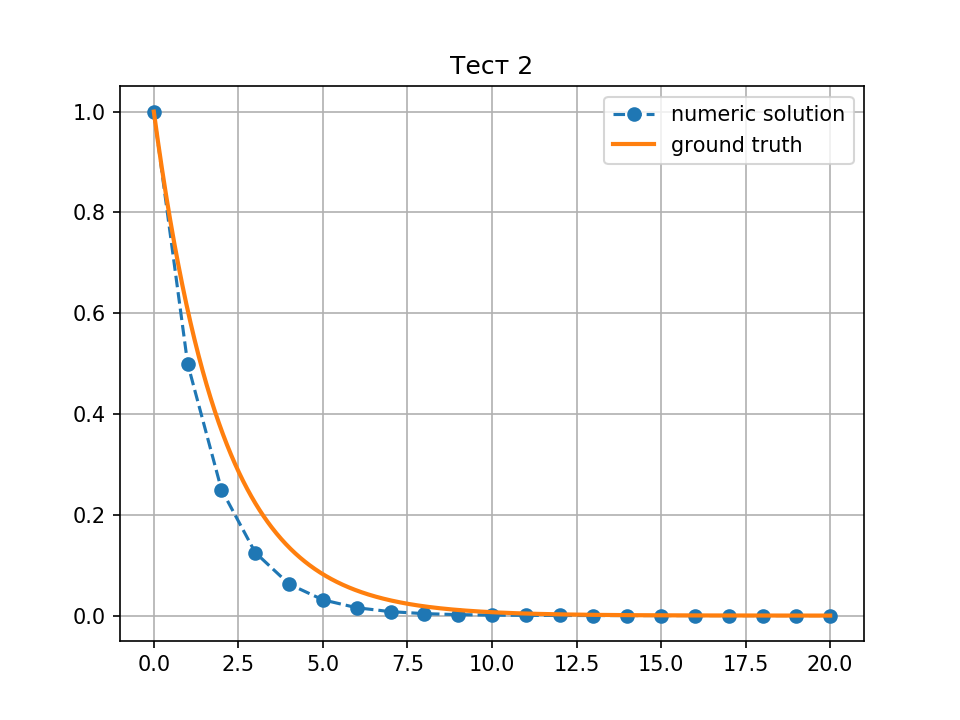

In [86]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=20, dt=1)
ttt = np.linspace(min(tt), max(tt), 1000)

plt.figure('Тест 2')
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(ttt, np.exp(lam*ttt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.title('Тест 2')

plt.grid(True)

<IPython.core.display.Javascript object>


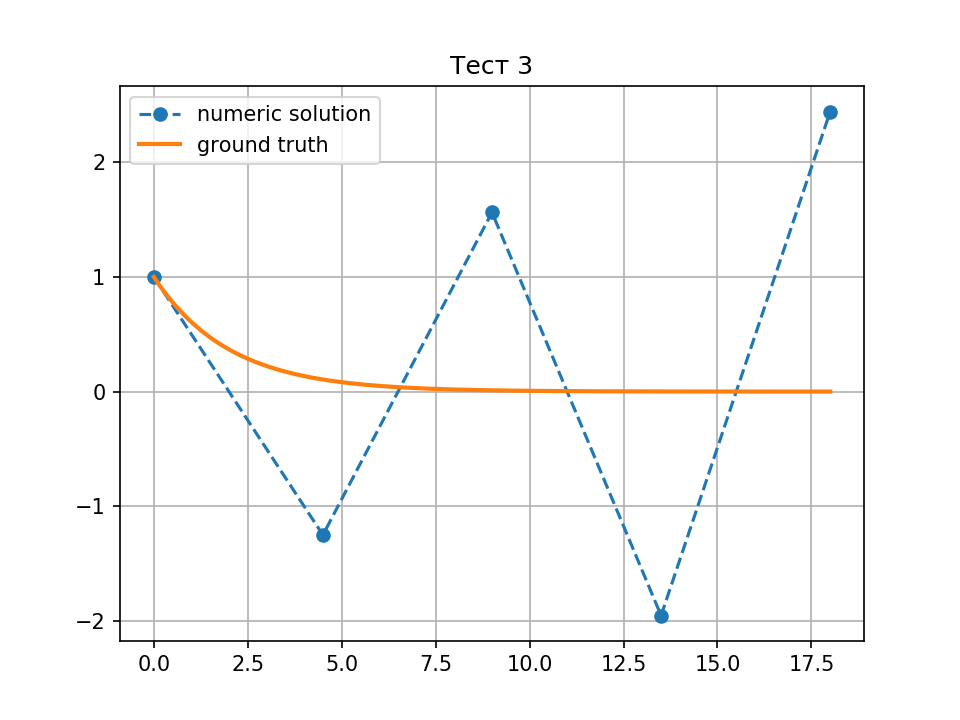

In [87]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=20, dt=4.5)
ttt = np.linspace(min(tt), max(tt), 1000)

plt.figure('Тест 3')
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(ttt, np.exp(lam*ttt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.title('Тест 3')

plt.grid(True)

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

In [33]:
def euler_solve_implicit(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] / (1 - dt*lam)
    return tt, y

<IPython.core.display.Javascript object>


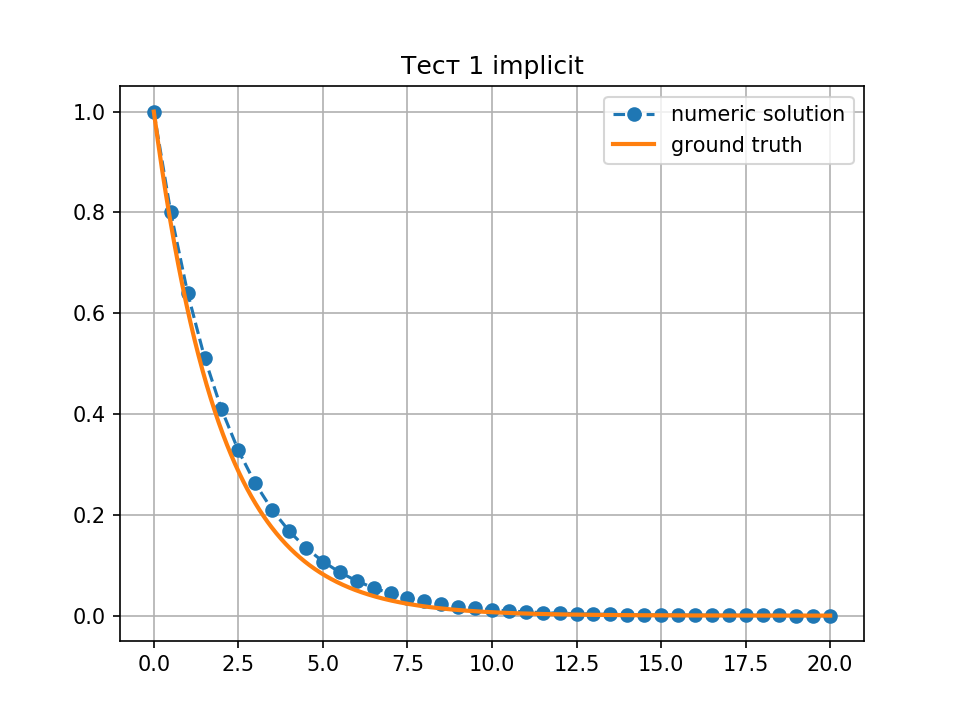

In [88]:
lam = -0.5
tt, y = euler_solve_implicit(lam, u0=1.0, T=20, dt=0.5)
ttt = np.linspace(min(tt), max(tt), 1000)

plt.figure('Тест 1 имплисит')
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(ttt, np.exp(lam*ttt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.title('Тест 1 implicit')

plt.grid(True)

<IPython.core.display.Javascript object>


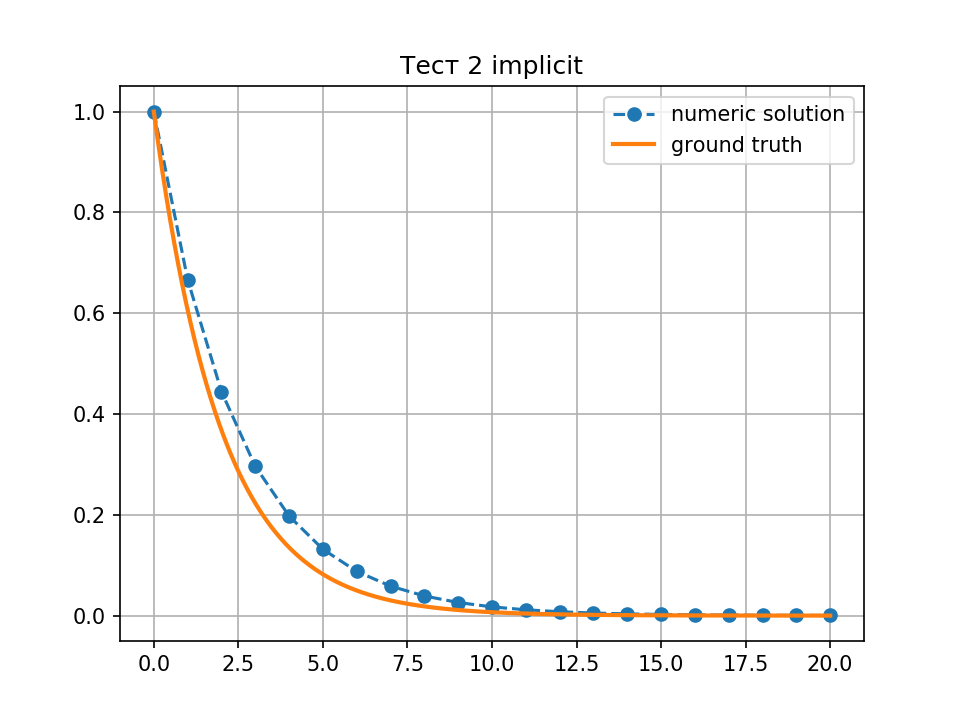

In [89]:
lam = -0.5
tt, y = euler_solve_implicit(lam, u0=1.0, T=20, dt=1)
ttt = np.linspace(min(tt), max(tt), 1000)

plt.figure('Тест 2 имплисит')
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(ttt, np.exp(lam*ttt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.title('Тест 2 implicit')

plt.grid(True)

<IPython.core.display.Javascript object>


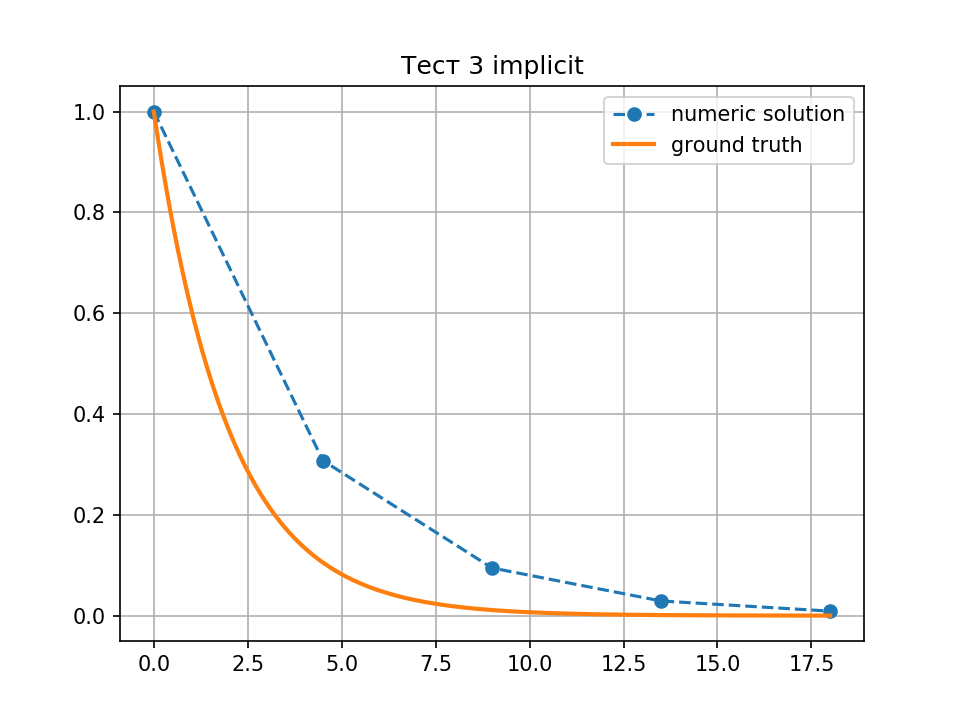

In [90]:
lam = -0.5
tt, y = euler_solve_implicit(lam, u0=1.0, T=20, dt=4.5)
ttt = np.linspace(min(tt), max(tt), 1000)

plt.figure('Тест 3 имплисит')
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(ttt, np.exp(lam*ttt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.title('Тест 3 implicit')

plt.grid(True)

Ну експлисит расходится, а имплисит нет. Как-то так.

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [55]:
def euler_solve_explicit(A, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty((num_steps+1, 2))
    y[0, :] = u0
    for k in range(num_steps):
        y[k+1, :] = (np.eye(2) + A * dt) @ y[k, :]
    return tt, y

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

<IPython.core.display.Javascript object>


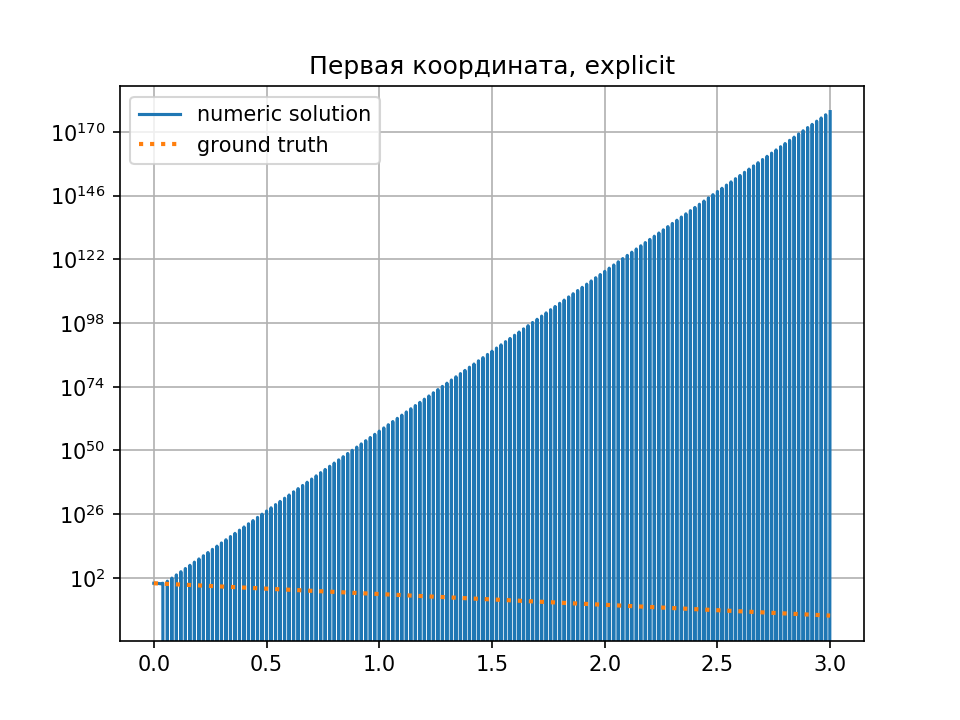

<IPython.core.display.Javascript object>


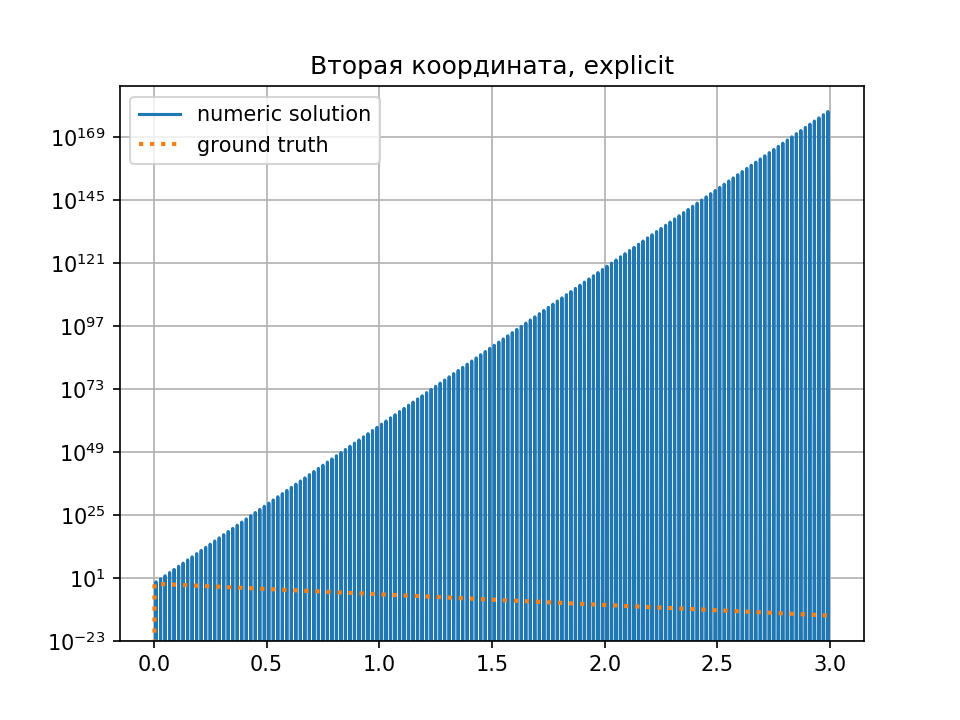

In [95]:
from scipy.linalg import expm
u0=np.array([1, 0])
dt = 0.01
A = np.array([[-10, 10], 
              [32, -499]])
tt, y = euler_solve_explicit(A, u0, T=3, dt=dt)
ttt = np.linspace(0, 3, 1000)
real_solve = np.zeros((len(ttt), 2))
for i in range(len(ttt)): 
    real_solve[i, :] = expm(A*ttt[i])@u0


plt.figure('первая координата эксплисит')
plt.plot(tt, y[:, 0], '-', label='numeric solution')
plt.plot(ttt, real_solve[:,0], ':', lw=2, label='ground truth')
plt.legend(loc='best')
plt.yscale('log')
plt.title('Первая координата, explicit')
plt.grid(True)

plt.figure('вторая координата эксплисит')
plt.plot(tt, y[:, 1], '-', label='numeric solution')
plt.plot(ttt, real_solve[:,1], ':', lw=2, label='ground truth')
plt.legend(loc='best')
plt.yscale('log')
plt.title('Вторая координата, explicit')

plt.grid(True)

Теперь найдем собственные значения матрицы $А$.

In [69]:
lambda_1, lambda_2 = np.linalg.eigvals(A)
print(lambda_1, lambda_2)

-9.346476672269716 -499.6535233277303


Чтобы ничего не расходилось, нужно тау < 2 : |лямбда|, где лямбда - все собственые числа матрицы А. Проверим наше тау (спойлер: оно не подходит).

In [70]:
dt_1 = 2 / abs(lambda_1)
dt_2 = 2 / abs(lambda_2)
print('Наше тау =', dt)
print(dt_1, dt_2)

Наше тау = 0.01
0.21398437829881367 0.004002773735447413


Видим, что тау не удовлетворяет условию для второго собственного числа. Значит, такое тау нам не подходит. Подберем такое тау, которое подходит по теории и проверим для него.

<IPython.core.display.Javascript object>


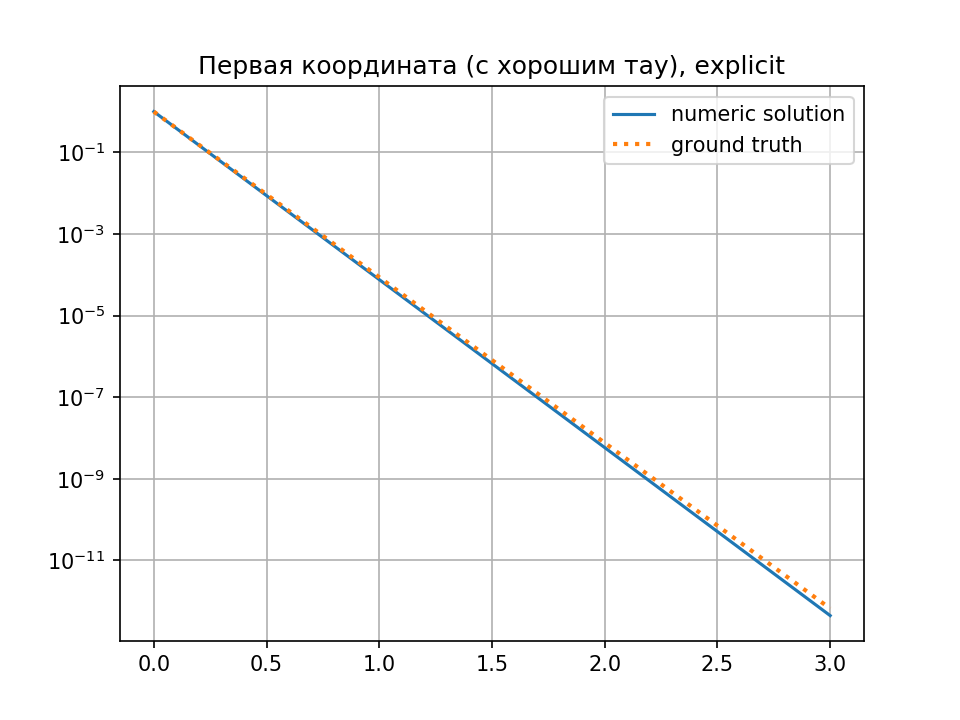

<IPython.core.display.Javascript object>


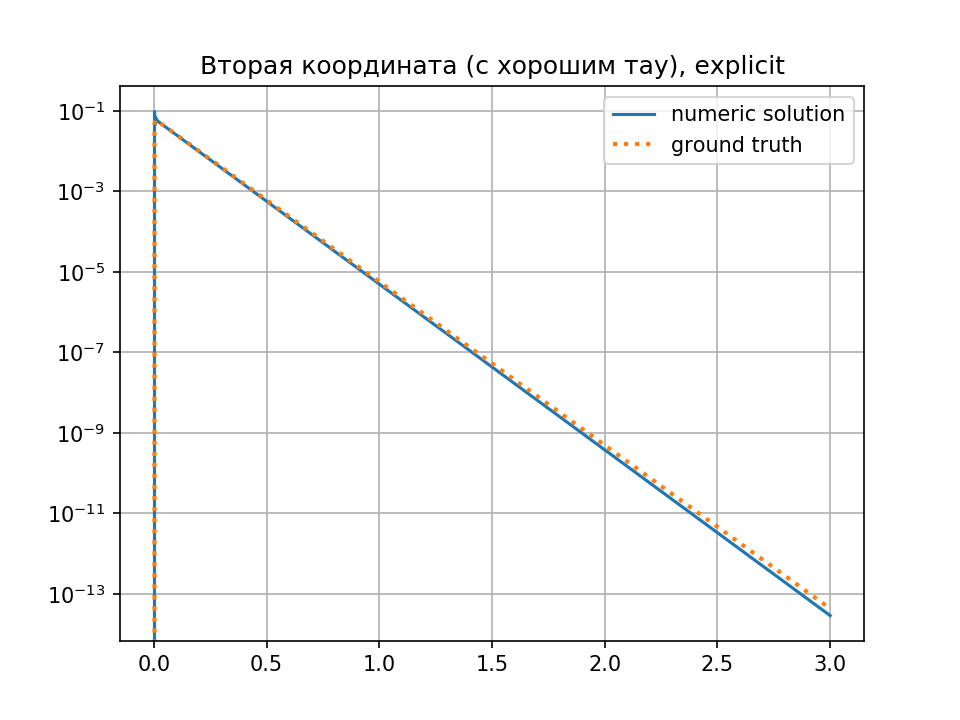

In [94]:
u0=np.array([1, 0])
dt = 0.003
A = np.array([[-10, 10], 
              [32, -499]])
tt, y = euler_solve_explicit(A, u0, T=3, dt=dt)
ttt = np.linspace(0, 3, 1000)
real_solve = np.zeros((len(ttt), 2))
for i in range(len(ttt)): 
    real_solve[i, :] = expm(A*ttt[i])@u0


plt.figure('первая координата эксплисит с хорошим тау')
plt.plot(tt, y[:, 0], '-', label='numeric solution')
plt.plot(ttt, real_solve[:,0], ':', lw=2, label='ground truth')
plt.legend(loc='best')
plt.yscale('log')
plt.title('Первая координата (с хорошим тау), explicit')
plt.grid(True)

plt.figure('вторая координата эксплисит с хорошим тау')
plt.plot(tt, y[:, 1], '-', label='numeric solution')
plt.plot(ttt, real_solve[:,1], ':', lw=2, label='ground truth')
plt.legend(loc='best')
plt.yscale('log')
plt.title('Вторая координата (с хорошим тау), explicit')

plt.grid(True)

Теперь всё хорошо и красиво.

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [71]:
  
#(y(n+1) - y(n))/ tay = A * y(n+1)
#y(n+1) - y(n) = A*y(n+1)*tay
#y(n+1) - A*y(n+1)*tay = y(n)
#(1 - A*tay) * y(n+1) = y(n)

    
def euler_solve_implicit_new(A, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty((num_steps+1, 2))
    y[0, :] = u0
    mat = np.eye(2) - A*dt
    for k in range(num_steps):
        y[k+1, :] = np.linalg.solve(mat, y[k, :])
    return tt, y

<IPython.core.display.Javascript object>


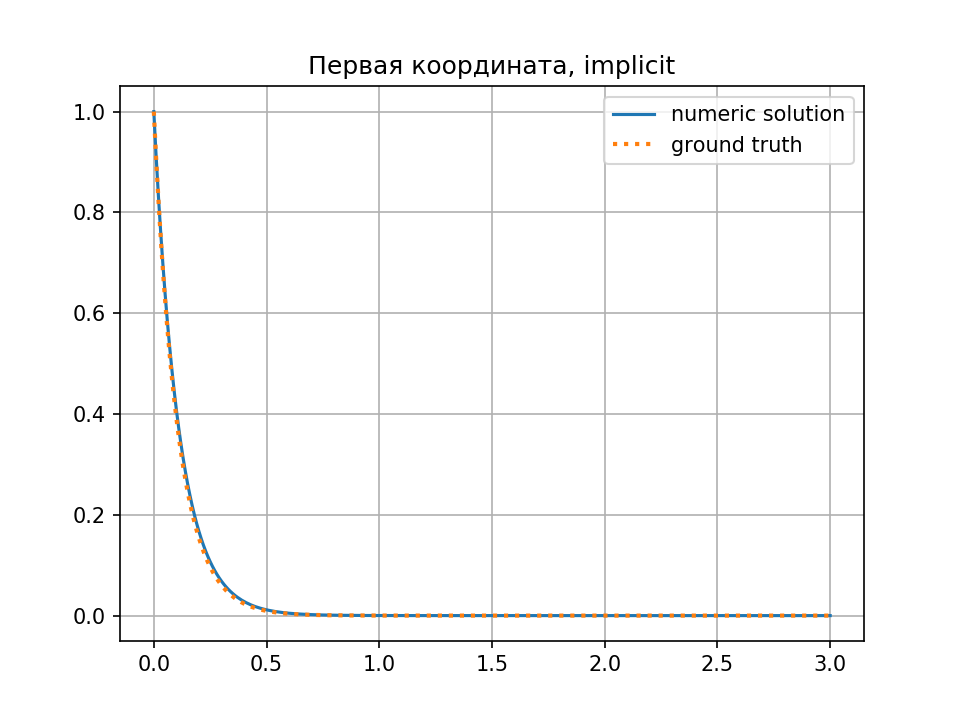

<IPython.core.display.Javascript object>


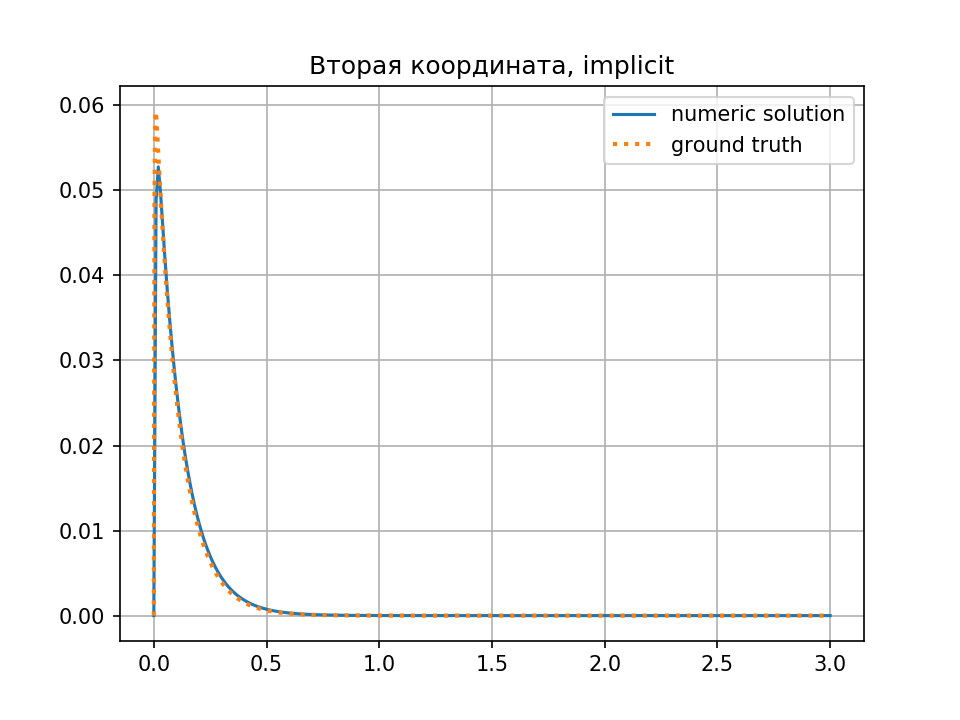

In [96]:
u0=np.array([1, 0])
dt = 0.01
A = np.array([[-10, 10], 
              [32, -499]])
tt, y = euler_solve_implicit_new(A, u0, T=3, dt=dt)
ttt = np.linspace(0, 3, 1000)
real_solve = np.zeros((len(ttt), 2))
for i in range(len(ttt)): 
    real_solve[i, :] = expm(A*ttt[i])@u0


plt.figure('первая координата имплисит')
plt.plot(tt, y[:, 0], '-', label='numeric solution')
plt.plot(ttt, real_solve[:,0], ':', lw=2, label='ground truth')
plt.legend(loc='best')
plt.title('Первая координата, implicit')
plt.grid(True)

plt.figure('вторая координата имплисит')
plt.plot(tt, y[:, 1], '-', label='numeric solution')
plt.plot(ttt, real_solve[:,1], ':', lw=2, label='ground truth')
plt.legend(loc='best')
plt.title('Вторая координата, implicit')
plt.grid(True)

Implicit метод хорошо сходится и при таком тау, в отличие от explicit.

# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

Нам нужно свести решение диффура для гармоническго осциллятора к такому диффуру, который мы уже умеем решать.

<IPython.core.display.Javascript object>


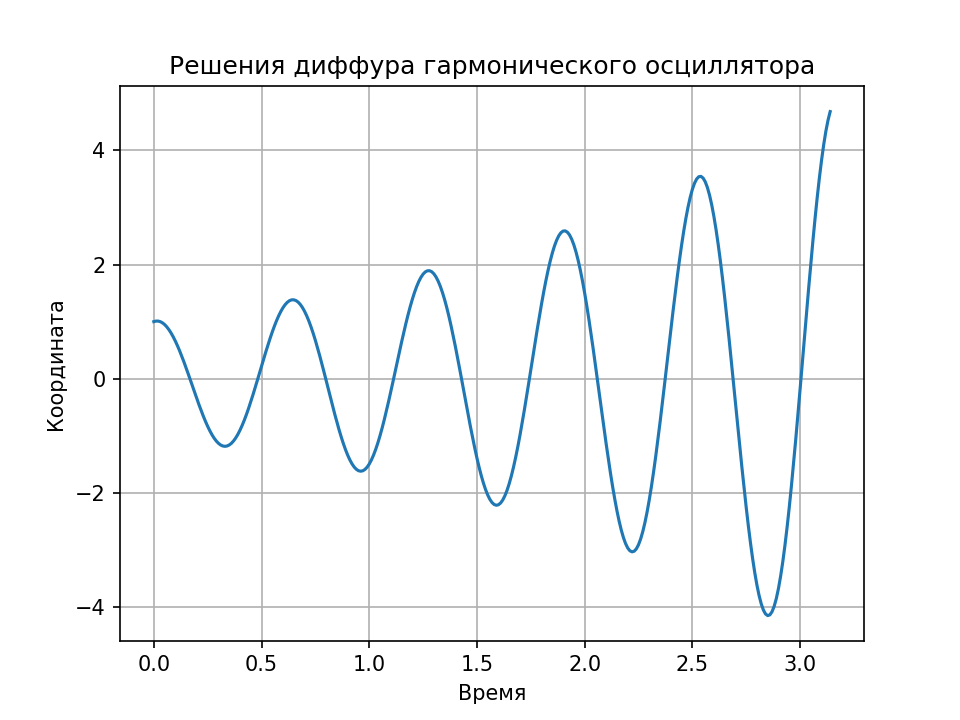

<IPython.core.display.Javascript object>


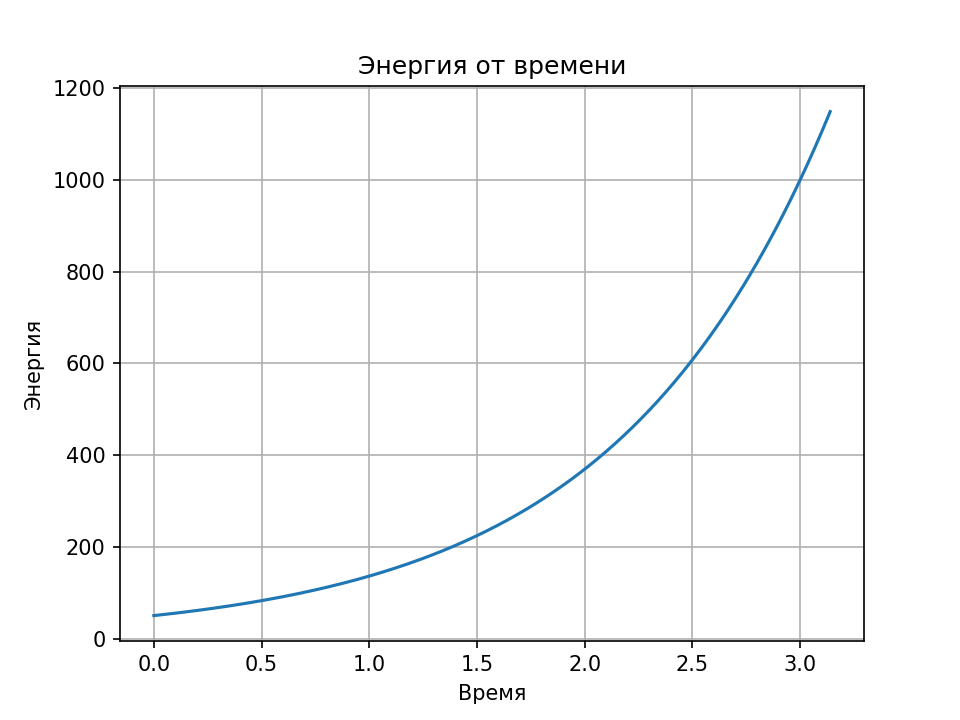

In [102]:
u0 = [1, 1]
dt = 0.01
omega = 10
T = 10 * np.pi / omega
A = np.array([[0, 1], 
              [- omega**2, 0]])  
tt, y = euler_solve_explicit(A, u0, T, dt)
plt.figure('Решения диффура гарм. осциллятора')
plt.title('Решения диффура гармонического осциллятора')
plt.grid()
plt.xlabel('Время')
plt.ylabel('Координата')
plt.plot(tt, y[:, 0])

plt.figure('Энергия от времени')
plt.title('Энергия от времени')
plt.xlabel('Время')
plt.ylabel('Энергия')
plt.plot(tt, y[:,1]**2 / 2 + omega**2 * y[:,0]**2 / 2)
plt.grid()

Энергия от времени увеличивается.

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

In [82]:
def Runge_Kutta(A, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty((num_steps+1, 2))
    y[0, :] = u0
    E = np.eye(2)
    
    for k in range(num_steps):
        y_n_plus_half = (E + A * dt / 2) @ y[k, :]
        y[k+1, :] = y[k, :] + A@y_n_plus_half*dt       
    return tt, y

<IPython.core.display.Javascript object>


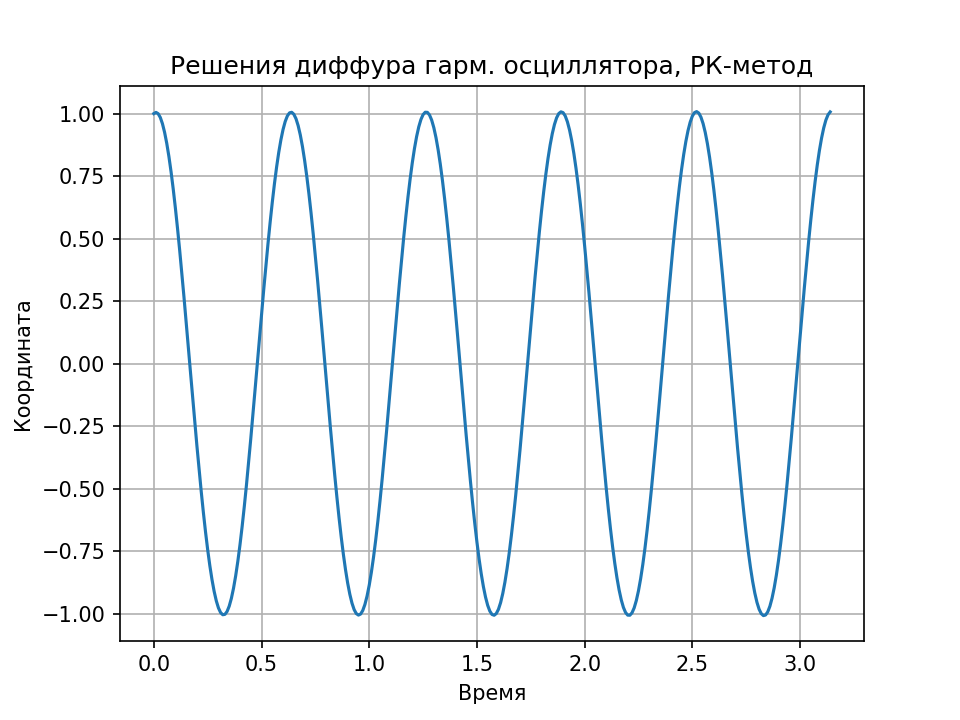

<IPython.core.display.Javascript object>


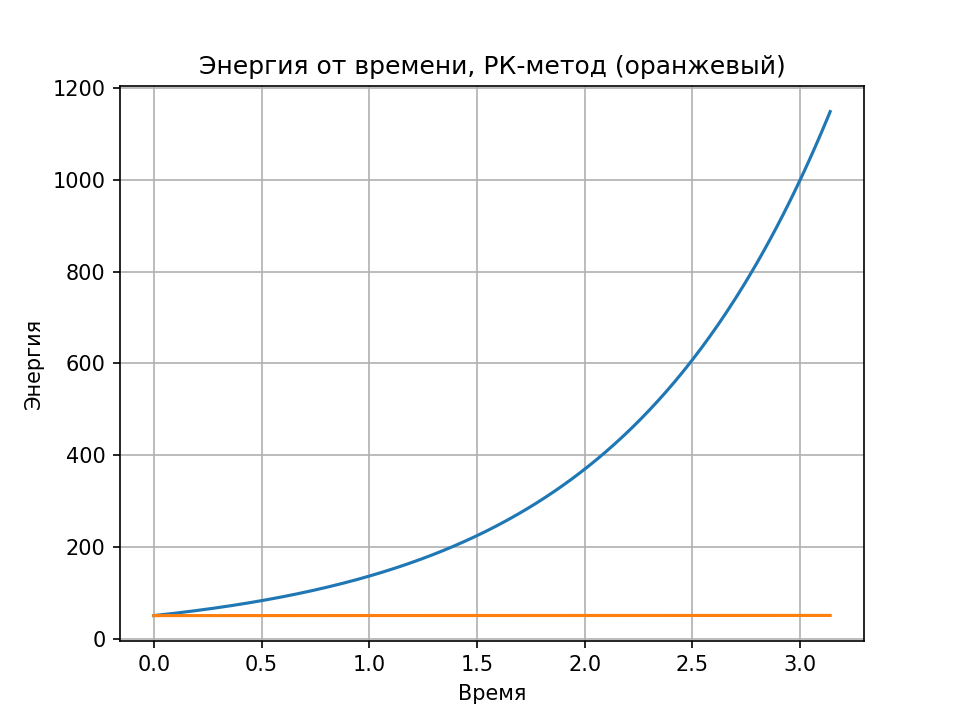

In [101]:
u0 = [1, 1]
dt = 0.01
omega = 10
T = 10 * np.pi / omega
A = np.array([[0, 1], 
              [- omega**2, 0]])  

tt, y = euler_solve_explicit(A, u0, T, dt)
tt_RK, y_RK = Runge_Kutta(A, u0, T, dt)

plt.figure('Решения диффура гарм. осциллятора RK')
plt.title('Решения диффура гарм. осциллятора, РК-метод')
plt.grid()
plt.xlabel('Время')
plt.ylabel('Координата')
plt.plot(tt_RK, y_RK[:, 0])

plt.figure('Энергия RK')
plt.xlabel('Время')
plt.ylabel('Энергия')
plt.title('Энергия от времени, РК-метод (оранжевый)')
plt.plot(tt, y[:,1]**2 / 2 + omega**2 * y[:,0]**2 / 2)

plt.plot(tt_RK, y_RK[:,1]**2 / 2 + omega**2 * y_RK[:,0]**2 / 2)


plt.grid()

При вычислении методом Рунге-Кутта энергия сохраняется.